In [9]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import gribscan
import intake
import cdo
cdo_tool= cdo.Cdo()

In [10]:
eerie_cat=intake.open_catalog("https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml")
eerie_cat

eerie:
  args:
    path: https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [11]:
eerie_cat=intake.open_catalog("https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml")
eerie_cat

model = 'ifs-fesom2-sr'
expid = 'eerie-spinup-1950'
version = 'v20240304'    #'v20231106'
realm='ocean'
gridspec = 'gr025'

cat_data=eerie_cat['dkrz.disk.model-output'][model][expid][version][realm][gridspec]
print(list(cat_data))
ds = cat_data['daily'].to_dask()
ds

['daily', 'monthly']


<xarray.Dataset>
Dimensions:  (time: 11323, lat: 721, lon: 1440)
Coordinates:
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * time     (time) datetime64[ns] 1950-01-01T23:50:00 ... 1980-12-31T23:50:00
Data variables:
    MLD2     (time, lat, lon) float32 dask.array<chunksize=(32, 721, 1440), meta=np.ndarray>
    a_ice    (time, lat, lon) float32 dask.array<chunksize=(32, 721, 1440), meta=np.ndarray>
    m_ice    (time, lat, lon) float32 dask.array<chunksize=(32, 721, 1440), meta=np.ndarray>
    ssh      (time, lat, lon) float32 dask.array<chunksize=(32, 721, 1440), meta=np.ndarray>
    sss      (time, lat, lon) float32 dask.array<chunksize=(32, 721, 1440), meta=np.ndarray>
    sst      (time, lat, lon) float32 dask.array<chunksize=(32, 721, 1440), meta=np.ndarray>
    uice     (time, lat, lon) float32 dask.array<chunksize=(32, 721, 1440), meta=np.ndarray>
    vice     (time, lat, lon) float32 dask.array<chunksize=(32, 721, 1440), meta=np.ndarray>
Attributes: (12/33)
    CDI:                           Climate Data Interface version 2.4.0 (http...
    CDO:                           Climate Data Operators version 2.4.0 (http...
    Conventions:                   CF-1.6
    DOKU_License:                  CC BY 4.0
    DOKU_Name:                     EERIE IFS-FESOM2-SR eerie-spinup-1950 run
    DOKU_authors:                  Ghosh, R.; Koldunov, N.; Wachsmann, F.
    ...                            ...
    history:                       deleted for convenience
    member_id:                     r1i1p1f1
    source_id:                     IFS-FESOM2-SR
    source_type:                   AOGCM
    time_max:                      978306600
    time_min:                      85800

In [12]:
#lonflip

sssm= ds['sss']
ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
ds = ds.sortby(ds.lon)
sssm

<xarray.DataArray 'sss' (time: 11323, lat: 721, lon: 1440)>
dask.array<open_dataset-bcc544358c8773385484ecf761920b1esss, shape=(11323, 721, 1440), dtype=float32, chunksize=(32, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * time     (time) datetime64[ns] 1950-01-01T23:50:00 ... 1980-12-31T23:50:00
Attributes:
    description:  sea surface salinity
    long_name:    sea surface salinity
    units:        psu

In [13]:
sssm_mon=sssm.resample(time="1M").mean()
sssm_mon
sssm_yr=sssm.resample(time="1Y").mean()
sssm_yr
sssm_yr_mean=sssm_yr[10:30].mean('time')
sssm_yr_mean

<xarray.DataArray 'sss' (lat: 721, lon: 1440)>
dask.array<mean_agg-aggregate, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cmocean
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'vcenter'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


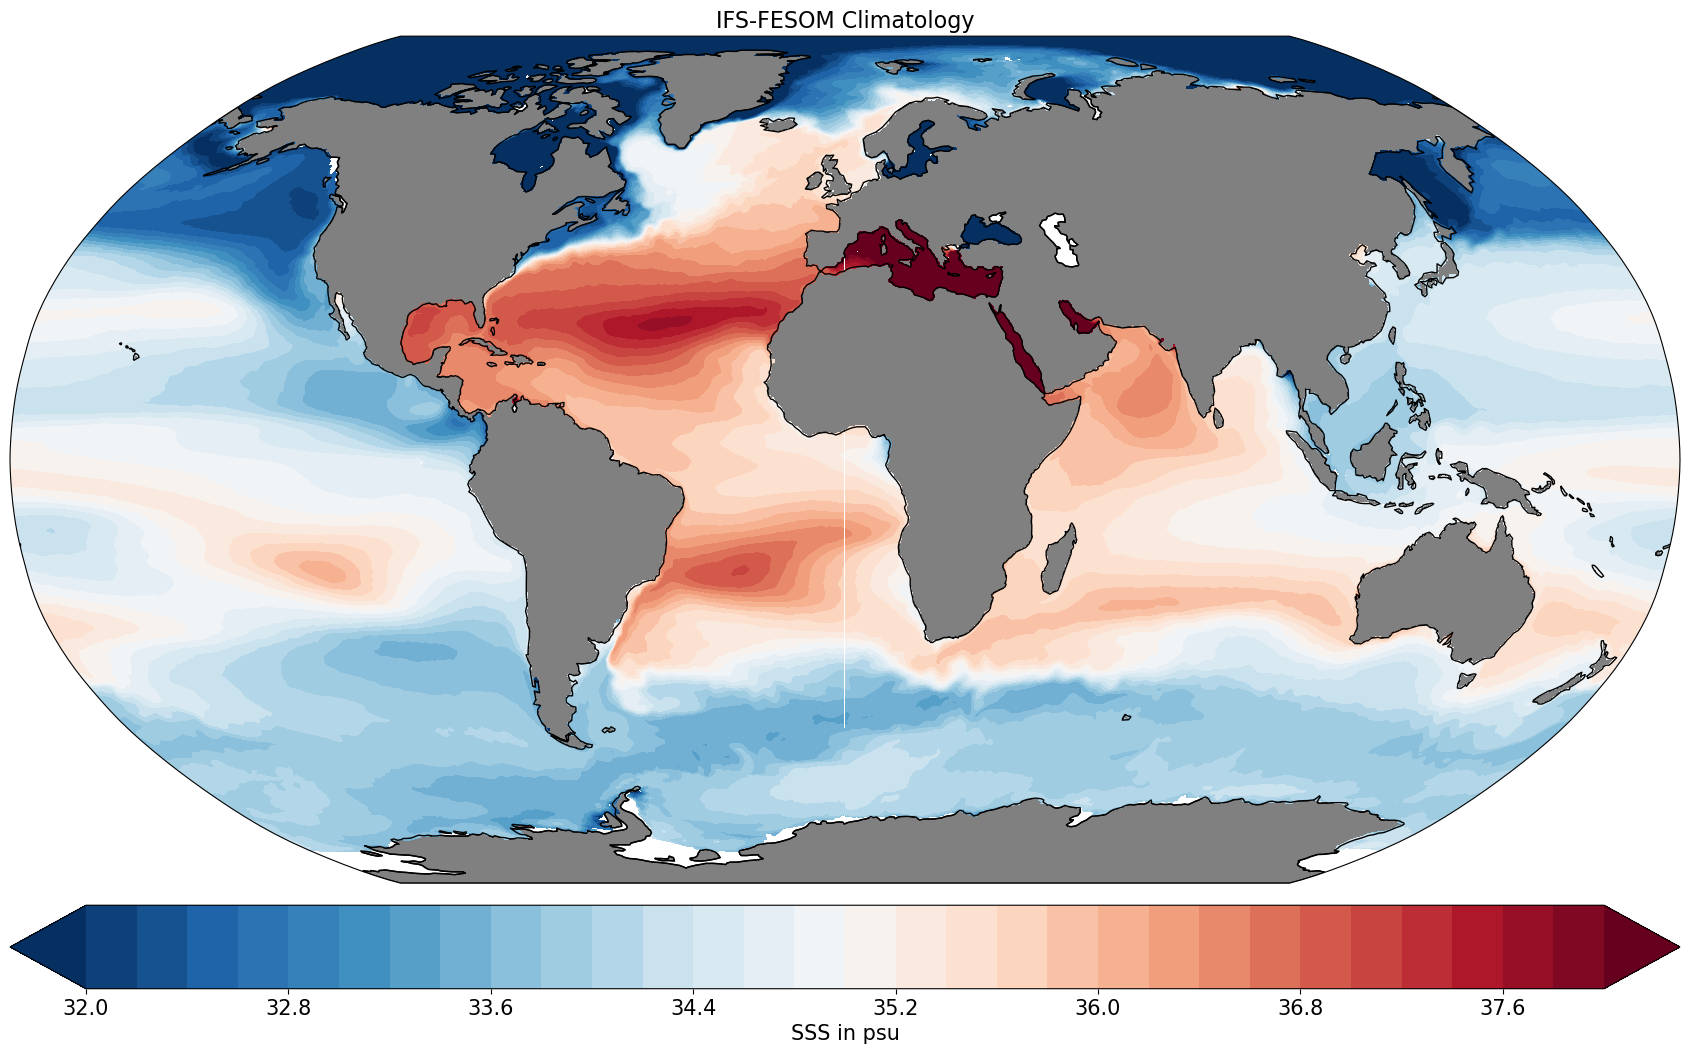

In [15]:
fig = plt.figure(figsize=(17,15))


ax1 = fig.add_subplot(111,
                 projection=ccrs.Robinson())



p1=sssm_yr_mean[:,:].plot.contourf(ax=ax1, vmin=32, vcenter=35, vmax=38,levels=31, extend='both', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree(), robust='true')

cb = plt.colorbar(p1, extend='both', orientation='horizontal', pad=0.015)
cb.set_label('SSS in psu', fontsize=15)

# Adjust colorbar tick label font size
cb.ax.tick_params(labelsize=15)  # Set the desired font size


ax1.coastlines()
ax1.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax1.set_title('IFS-FESOM Climatology', fontsize=16)


plt.tight_layout()

plt.savefig("IFS-FESOM_SSS_ctl1950_clim.png",bbox_inches='tight', dpi=300)